In [1]:
import numpy as np
from numpy import linalg
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors as colors
import rosbag
import glob
from urdf_parser_py.urdf import URDF
from pykdl_utils.kdl_parser import kdl_tree_from_urdf_model
from pykdl_utils.kdl_kinematics import KDLKinematics
import time
from IPython import display
import random

In [2]:
data_path = './Robot_ViconNovember/'

In [3]:
## Loading vicon  dynamic data and timestamps and store in np file
vicobags_dyna = glob.glob(data_path+'VD/*.bag')
for i,bag in enumerate(vicobags_dyna):
    vdbag = rosbag.Bag(bag)
    vicon_dynaXpos = []
    vicon_dynaYpos = []
    vicon_dynaZpos = []
    viconbag_time_dyna = []
    
#####Extracting the vicon pose from the data
    for topicc, msgg, tt in vdbag.read_messages(topics=['/vicon/PEE/PEE']): 
        vicon_dynaXpos.append(msgg.transform.translation.x)
        vicon_dynaYpos.append(msgg.transform.translation.y)
        vicon_dynaZpos.append(msgg.transform.translation.z) 
        vicon_time_dy = tt.secs
        viconbag_time_dyna.append(vicon_time_dy)
    vdbag.close()

    vicon_dynaXPosArr = np.array(vicon_dynaXpos)
    vicon_dynaYPosArr = np.array(vicon_dynaYpos)
    vicon_dynaZPosArr = np.array(vicon_dynaZpos)
    vicon_dynaPosArr = np.column_stack((vicon_dynaXPosArr,vicon_dynaYPosArr,vicon_dynaZPosArr)) 
    np.save(data_path+'vicon_dynaPosArr%d.npy'%i, vicon_dynaPosArr)
    np.save(data_path+'viconbag_time_dyna%d.npy'%i, viconbag_time_dyna)
    
# Loading robot dynamic data and timestamps and to extract camera data and robot joint angles 
robobags_dyna = glob.glob(data_path+'RD/*.bag')
for i,bag in enumerate(robobags_dyna):
    rdbag = rosbag.Bag(bag)
    robot_dynaXpos = []
    robot_dynaYpos = []
    robot_dynaZpos = []
    robotbag_Tagtime_dyna = []
    
#####Extracting April tag pose(camera) from the robot data
    for topi, msgs, tym in rdbag.read_messages(topics=['/tag_detections']):
        try:
            robot_dynaXpos.append(msgs.detections[0].pose.pose.pose.position.x)
            robot_dynaYpos.append(msgs.detections[0].pose.pose.pose.position.y)
            robot_dynaZpos.append(msgs.detections[0].pose.pose.pose.position.z)   
            robotbag_Tagtime_dyna.append(tym.secs)
        except:
            continue
    robot_dynaXposArr = np.array(robot_dynaXpos)
    robot_dynaYposArr = np.array(robot_dynaYpos)
    robot_dynaZposArr = np.array(robot_dynaZpos)
    robot_dynaposArr = np.column_stack((robot_dynaXposArr,robot_dynaYposArr,robot_dynaZposArr))
    np.save(data_path+'robot_dynaPosArr%d.npy'%i, robot_dynaposArr)
    np.save(data_path+'robotbag_Tagtime_dyna%d.npy'%i, robotbag_Tagtime_dyna)
    
#####Extracting camera info topic to get camera matrix from the camera data    
    for topi, msgs, tym in rdbag.read_messages(topics=['/Zimmie/camera_info']): 
        camera_matrix = msgs.K
    
#####Extracting robot joint angles and timestamps from the robot data    
    robotbag_Jointstime_dyna = []
    ja_list = []
    ja_turretCam = []
    for topic2, msg2, t2 in rdbag.read_messages(topics=['/Packbot510/joints']):
        ja_list.append(msg2.position[:3])
        print(msg2) #to check which joing angle corresponds to turretCam
        ja_turretCam.append(msg2.position[8]) # extracting turretcam only
        robotbag_Jointstime_dyna.append(t2.secs)
    ja_array_dyna = np.array(ja_list)
    ja_turretCam_dyna = np.array(ja_turretCam)
    np.save(data_path+'ja_array_dyna%d.npy'%i, ja_array_dyna)
    np.save(data_path+'ja_turretCam_dyna%d.npy'%i, ja_turretCam_dyna)
    np.save(data_path+'robotbag_Jointstime_dyna%d.npy'%i, robotbag_Jointstime_dyna)
rdbag.close()

#####Load Robot static data to get noise variance in the joint angles 
robobags_stat = glob.glob(data_path+'RS/*.bag')
for i,bag in enumerate(robobags_stat):
    rsbag = rosbag.Bag(bag)
    ja_list_stat = []
    for topic2, msg2, t2 in rsbag.read_messages(topics=['/Packbot510/joints']):
        ja_list_stat.append(msg2.position[:3])
    ja_array_stat = np.array(ja_list_stat)
    np.save(data_path+'ja_array_stat%d.npy'%i, ja_array_stat)

header: 
  seq: 17103
  stamp: 
    secs: 1604324040
    nsecs: 185658936
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.034140583127737045, -2.6736695766448975, 2.369504690170288, -1.9674464464187622, 1.18166983127594, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, -0.4653030037879944, 0.9386979937553406, 0.1077340841293335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 17104
  stamp: 
    secs: 1604324040
    nsecs: 289707789
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.034140583127737045, -2.6736695766448975, 2.369504690170288, -1.9674464464187622, 1.18166983127594, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.0, 0.0

header: 
  seq: 17371
  stamp: 
    secs: 1604324068
    nsecs: 203693095
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.034932561218738556, -2.9241740703582764, 2.6560840606689453, -2.216555118560791, 1.3781129121780396, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, -0.012725806795060635, 0.012725806795060635, -0.012916524894535542, 0.015572585165500641, 9.344205270656047e-11, 0.0, 0.0, 0.0, 0.0]
effort: [-0.9146993160247803, -9.14168930053711, -18.449657440185547, -4.347259044647217, -1.0302534103393555, -0.05572612211108208, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 17372
  stamp: 
    secs: 1604324068
    nsecs: 307576591
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.034932561218738556, -2.9255850315093994, 2.6574478149414062, -2.2177443504333496, 1.378

effort: [37.948890686035156, -446.2481994628906, 18.680078506469727, -7.712365627288818, -0.9106982946395874, -0.07393654435873032, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 17593
  stamp: 
    secs: 1604324091
    nsecs: 317985437
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.004022042732685804, -3.1251914501190186, 2.823915719985962, -2.443033218383789, 1.7234547138214111, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [27.17365837097168, -405.58148193359375, 5.083797931671143, -5.516602039337158, 0.0982501208782196, 0.013925389386713505, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 17594
  stamp: 
    secs: 1604324091
    nsecs: 421637020
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.004022042732685804, -3.1251

header: 
  seq: 17844
  stamp: 
    secs: 1604324117
    nsecs: 479181571
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.002717604860663414, -2.8332037925720215, 2.6136484146118164, -2.2120559215545654, 1.3477240800857544, 0.9439502358436584, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.0, -0.01763356290757656, 0.012926211580634117, -0.007792131043970585, 8.746389723590653e-11, 0.0, 0.0, 0.0, 0.0]
effort: [1.6027871370315552, 33.25395202636719, -11.885865211486816, 22.231962203979492, -3.043321132659912, -0.06668813526630402, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 17845
  stamp: 
    secs: 1604324117
    nsecs: 583476707
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.0026943113189190626, -2.8332037925720215, 2.6135306358337402, -2.2106080055236816, 1.3412038087844849, 0.

header: 
  seq: 18086
  stamp: 
    secs: 1604324142
    nsecs: 701760061
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.0018790375906974077, -2.7473948001861572, 2.4810214042663574, -2.097818374633789, 1.1940351724624634, 0.9448854327201843, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, -0.011700141243636608, 0.016575198620557785, -0.017153481021523476, 0.007755299098789692, -3.284318997320845e-11, 0.0, 0.0, 0.0, 0.0]
effort: [-0.6835307478904724, -9.528950691223145, -6.402982711791992, -1.020943284034729, -0.1441662609577179, -0.028161829337477684, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 18087
  stamp: 
    secs: 1604324142
    nsecs: 805233737
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.0018790375906974077, -2.747300863265991, 2.482150077819824, -2.0988526344299316, 1.

effort: [-0.22877894341945648, -0.43470460176467896, 18.571941375732422, -4.113847255706787, -0.39197760820388794, -0.35538554191589355, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 18352
  stamp: 
    secs: 1604324170
    nsecs: 399946673
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.00046582426875829697, -3.103231430053711, 2.8604490756988525, -2.4483754634857178, 1.513524055480957, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, -0.012694100849330425, 0.008788223378360271, -0.012884343974292278, 0.01553378626704216, 8.900313819282246e-11, 0.0, 0.0, 0.0, 0.0]
effort: [-0.2288481444120407, 0.5957377552986145, -1.9311386346817017, -4.0498270988464355, -0.39899730682373047, -0.39812472462654114, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 18353
  stamp: 
    secs: 1604324170
    nsecs: 503177235
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, e

header: 
  seq: 18568
  stamp: 
    secs: 1604324192
    nsecs: 897681670
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.0009084014454856515, -2.9671828746795654, 2.759711265563965, -2.3402717113494873, 1.3873920440673828, 0.9444178342819214, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.012755542993545532, -0.011774348095059395, 0.01294670719653368, -0.011706729419529438, 0.0039022432174533606, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, 29.264877319335938, -64.182373046875, 24.74091911315918, -2.6362926959991455, -0.6373666524887085, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 18569
  stamp: 
    secs: 1604324193
    nsecs:    713365
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.0009084014454856515, -2.965548515319824, 2.7581355571746826, -2.335601806640625, 1.385568380355835, 0.9443

header: 
  seq: 18826
  stamp: 
    secs: 1604324219
    nsecs: 755589252
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.0012578972382470965, -2.648632049560547, 2.3288209438323975, -1.9674464464187622, 1.1013987064361572, 0.944932222366333, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233094573020935]
velocity: [0.0, 0.011816750280559063, -0.019694583490490913, 0.01732444390654564, -0.007832593284547329, 1.1523950543823602e-10, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, 22.455585479736328, -53.469512939453125, 15.760354995727539, -2.6681480407714844, -0.8893275856971741, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 18827
  stamp: 
    secs: 1604324219
    nsecs: 859023981
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.0012578972382470965, -2.649043560028076, 2.3275628089904785, -1.9674464464187622, 1.1007908582687378, 0.

header: 
  seq: 51104
  stamp: 
    secs: 1604327584
    nsecs: 848313457
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.130850076675415, -2.2343757152557373, 2.360877752304077, -2.7528445720672607, 1.5368051528930664, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, 0.0, -3.7698347568511963, -1.8383082151412964, 0.11408836394548416, -0.00013519276399165392, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 51105
  stamp: 
    secs: 1604327584
    nsecs: 955491365
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.130850076675415, -2.2343757152557373, 2.360877752304077, -2.7528445720672607, 1.5368051528930664, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
ve

effort: [0.0, -2.5327987670898438, -1.3852134943008423, -3.742157220840454, -0.5605635046958923, -0.0135905547067523, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 51403
  stamp: 
    secs: 1604327615
    nsecs: 982494766
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.130850076675415, -2.379603862762451, 2.6395442485809326, -3.0737743377685547, 1.7227532863616943, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
velocity: [0.0, -0.009914551861584187, 0.01288891676813364, -0.013082079589366913, 0.011829136870801449, 0.003943045623600483, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, -4.954979419708252, 2.9204459190368652, -5.0314459800720215, -0.2152056097984314, -0.34708312153816223, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 51404
  stamp: 
    secs: 1604327616
    nsecs:  86638588
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, tu

header: 
  seq: 51656
  stamp: 
    secs: 1604327642
    nsecs: 336582524
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1314557790756226, -2.305396795272827, 2.590398073196411, -2.9768564701080322, 1.7150378227233887, 0.6380892992019653, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
velocity: [0.0, 0.009788267314434052, -0.012724747881293297, 0.017220597714185715, -0.011678465642035007, -0.0038928219582885504, 0.0, 0.0, 0.0, 0.0]
effort: [1.3751364946365356, 8.923149108886719, -51.363853454589844, 23.52621078491211, -2.4952640533447266, -0.3076530396938324, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 51657
  stamp: 
    secs: 1604327642
    nsecs: 440541756
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1314557790756226, -2.3046913146972656, 2.590398073196411, -2.9737377166748047, 1.71363496780

header: 
  seq: 51886
  stamp: 
    secs: 1604327666
    nsecs: 290791263
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1312460899353027, -2.182842969894409, 2.312413454055786, -2.686505079269409, 1.4884659051895142, 0.6381828188896179, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
velocity: [0.0, -0.005875895265489817, 0.014689738862216473, -0.01722920686006546, 0.015579071827232838, 1.9035191478611324e-10, 0.0, 0.0, 0.0, 0.0]
effort: [-0.22892896831035614, 15.800440788269043, 12.634065628051758, -3.9587302207946777, -0.9568260312080383, 0.043955981731414795, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 51887
  stamp: 
    secs: 1604327666
    nsecs: 394806667
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1312460899353027, -2.182948589324951, 2.3204174041748047, -2.6914854049682617, 1.48846590

header: 
  seq: 52157
  stamp: 
    secs: 1604327694
    nsecs: 512557154
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1319681406021118, -2.335334062576294, 2.664029121398926, -3.096456289291382, 1.7216310501098633, 0.6381828188896179, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22341535985469818]
velocity: [0.0, 0.009757399559020996, -0.01366035919636488, 0.012874720618128777, -0.019402731209993362, 0.0038805459626019, 0.0, 0.0, 0.0, 0.0]
effort: [0.0, 13.03039836883545, -34.15198516845703, 27.80896759033203, 1.1246110200881958, -0.38538071513175964, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 52158
  stamp: 
    secs: 1604327694
    nsecs: 616969003
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1319681406021118, -2.3300578594207764, 2.6635117530822754, -3.095370292663574, 1.7216310501098633, 0.6381360292434

header: 
  seq: 52425
  stamp: 
    secs: 1604327722
    nsecs: 427690762
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1321312189102173, -2.1705238819122314, 2.3204174041748047, -2.7001888751983643, 1.4960618019104004, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22342292964458466]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-0.6875670552253723, 13.084749221801758, -40.48813247680664, 19.732864379882812, -1.3699846267700195, -0.05532008409500122, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 52426
  stamp: 
    secs: 1604327722
    nsecs: 530390918
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1321312189102173, -2.1705238819122314, 2.3204174041748047, -2.7001888751983643, 1.4960618019104004, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.87266463041

header: 
  seq: 61283
  stamp: 
    secs: 1604328645
    nsecs:  33703594
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.893387496471405, -2.5239267349243164, 2.5296854972839355, -3.1186211109161377, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22346831858158112]
velocity: [-0.06376495957374573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [28.196237564086914, 9.327319145202637, -28.694154739379883, 2.0527307987213135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 61284
  stamp: 
    secs: 1604328645
    nsecs: 138247939
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.8872845768928528, -2.5243382453918457, 2.5296854972839355, -3.119448661804199, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2234683185

header: 
  seq: 61488
  stamp: 
    secs: 1604328666
    nsecs: 380093544
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.2485349178314209, -2.5141355991363525, 2.5535824298858643, -3.1196553707122803, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2234758734703064]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [2.5097010135650635, 17.727092742919922, -19.766260147094727, -0.43230628967285156, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 61489
  stamp: 
    secs: 1604328666
    nsecs: 483216355
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.2485349178314209, -2.5141355991363525, 2.5535824298858643, -3.1196553707122803, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2234758734703064]
vel

effort: [31.692625045776367, -30.289400100708008, 20.18644142150879, 16.69439125061035, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 59884
  stamp: 
    secs: 1604328499
    nsecs: 351338296
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.13799136877059937, -2.3568003177642822, 2.499109983444214, -3.1186211109161377, 1.4886997938156128, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22345317900180817]
velocity: [-0.0700206458568573, -0.011781228706240654, -0.0009817690588533878, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [36.68486022949219, 72.98541259765625, 4.2144389152526855, 26.16417121887207, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 59885
  stamp: 
    secs: 1604328499
    nsecs: 455794425
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.1313527226448059, -2.3586933612823486, 2.4

header: 
  seq: 60081
  stamp: 
    secs: 1604328519
    nsecs: 869142769
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.5440220236778259, -2.3914172649383545, 2.5142037868499756, -3.1196553707122803, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22345317900180817]
velocity: [0.07234016805887222, 0.0029606346506625414, -0.0029606346506625414, 0.004340562503784895, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-24.303319931030273, 12.465052604675293, -48.744590759277344, -1.516708254814148, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 60082
  stamp: 
    secs: 1604328519
    nsecs: 976052907
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.5507538914680481, -2.391957998275757, 2.5140156745910645, -3.1197071075439453, 1.4884659051895142, 0.6381360292434692, 0.00393760716542601

header: 
  seq: 60337
  stamp: 
    secs: 1604328546
    nsecs: 551756722
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.9167042970657349, -2.4060287475585938, 2.504495143890381, -3.120948314666748, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22345317900180817]
velocity: [-0.06595437228679657, -0.0029374584555625916, -0.003916610963642597, -0.0043065836653113365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [24.876258850097656, -18.281957626342773, -35.83635711669922, 8.392619132995605, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 60338
  stamp: 
    secs: 1604328546
    nsecs: 654790989
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.9104849100112915, -2.406287431716919, 2.504495143890381, -3.1203794479370117, 1.4884659051895142, 0.6381360292434692, 0.003937607165426016,

header: 
  seq: 66204
  stamp: 
    secs: 1604329157
    nsecs: 907274551
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.7986289262771606, -2.747300863265991, 2.7990193367004395, -2.7651164531707764, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-1.1414021253585815, 16.80555534362793, -23.56431007385254, 1.9468967914581299, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 66205
  stamp: 
    secs: 1604329158
    nsecs:  11335484
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.7986289262771606, -2.747300863265991, 2.7990193367004395, -2.7651164531707764, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: 

header: 
  seq: 66497
  stamp: 
    secs: 1604329188
    nsecs: 425607968
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.1872028261423111, -2.5754950046539307, 2.786747455596924, -2.9123785495758057, 1.755921483039856, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [0.0, 0.0, 0.0, 0.0, -0.015606367029249668, 1.3685381994310575e-10, 0.0, 0.0, 0.0, 0.0]
effort: [-0.9121041893959045, 23.75741195678711, -44.66194152832031, -2.0511128902435303, -3.066497802734375, -1.1066559553146362, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 66498
  stamp: 
    secs: 1604329188
    nsecs: 529565602
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.18724942207336426, -2.5755536556243896, 2.786747455596924, -2.912895679473877, 1.7565761804580688, 0.6381360292434692, 0.003937607165426016, -

effort: [0.4556295573711395, 47.203922271728516, -52.22836685180664, 23.138843536376953, -1.7145646810531616, -0.9204657077789307, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 66753
  stamp: 
    secs: 1604329215
    nsecs: 108094590
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.026958482339978218, -2.587766647338867, 2.7495791912078857, -3.0664310455322266, 1.7561085224151611, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [0.0, 0.013645637780427933, -0.012670949101448059, 0.012860845774412155, -0.015505456365644932, 1.4679892718083565e-11, 0.0, 0.0, 0.0, 0.0]
effort: [0.4554049074649811, 34.610599517822266, -54.98293685913086, 25.778839111328125, -1.6426044702529907, -0.792665421962738, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 66754
  stamp: 
    secs: 1604329215
    nsecs: 211944503
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, hea

header: 
  seq: 67009
  stamp: 
    secs: 1604329241
    nsecs: 773677538
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.026911893859505653, -2.460827350616455, 2.329256057739258, -2.654463052749634, 1.4516503810882568, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [0.0, 0.0, -0.014687291346490383, 0.017226334661245346, -0.007788237649947405, -6.436714355961826e-11, 0.0, 0.0, 0.0, 0.0]
effort: [-0.22722657024860382, 18.546751022338867, -44.27820587158203, 31.410097122192383, -0.7172624468803406, -0.3251580595970154, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 67010
  stamp: 
    secs: 1604329241
    nsecs: 877342060
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.026911893859505653, -2.460827350616455, 2.3277978897094727, -2.6526529788970947, 1.451603651046753, 0.63

header: 
  seq: 67259
  stamp: 
    secs: 1604329267
    nsecs: 818986869
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.026935188099741936, -2.501863718032837, 2.4458281993865967, -2.81461763381958, 1.470328450202942, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [0.0, -0.002942359074950218, 0.015692582353949547, -0.01725507527589798, 0.00780123146250844, 5.5342896931875885e-11, 0.0, 0.0, 0.0, 0.0]
effort: [-0.2283153533935547, -22.08665657043457, -16.417097091674805, -7.171079635620117, 0.9792739152908325, 0.41181421279907227, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 67260
  stamp: 
    secs: 1604329267
    nsecs: 923143149
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.026935188099741936, -2.501863718032837, 2.447345018386841, -2.8166344165802, 1.471216917037

header: 
  seq: 67495
  stamp: 
    secs: 1604329292
    nsecs: 436913952
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.17331987619400024, -2.3546135425567627, 2.6763010025024414, -3.118879795074463, 1.6235498189926147, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [-0.0019427469233050942, -0.0009806228335946798, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [4.890733242034912, 12.049901008605957, -33.89030838012695, 0.0, 0.24242186546325684, 0.013957026414573193, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 67496
  stamp: 
    secs: 1604329292
    nsecs: 541119947
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.17373916506767273, -2.3546016216278076, 2.6763010025024414, -3.1198105812072754, 1.6235498189926147, 0.6381360292434692, 0.003937607165426016, -1.57079637

header: 
  seq: 67755
  stamp: 
    secs: 1604329319
    nsecs: 564717130
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.9921056628227234, -2.3116602897644043, 2.688513994216919, -3.1197588443756104, 1.6235498189926147, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2235061377286911]
velocity: [-0.01732577010989189, 0.07287809997797012, -0.0009717080392874777, 0.004273839760571718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [6.428465843200684, -50.184486389160156, 15.320276260375977, -2.7652909755706787, 0.056765008717775345, 0.02833130583167076, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 67756
  stamp: 
    secs: 1604329319
    nsecs: 663659253
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.9906847476959229, -2.304985284805298, 2.688502073287964, -3.1186211109161377, 1.6235498189926147, 0.638136029

header: 
  seq: 43272
  stamp: 
    secs: 1604326768
    nsecs: 812535471
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1904737949371338, -2.4895684719085693, 2.308145523071289, -2.151524066925049, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336997091770172]
velocity: [0.0, -0.0009780939435586333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-0.6838921308517456, 4.587206840515137, -45.40363693237305, 8.597860336303711, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 43273
  stamp: 
    secs: 1604326768
    nsecs: 917048170
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1904737949371338, -2.4895801544189453, 2.308145523071289, -2.151524066925049, 1.795262098312378, 0.6380892992019653, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.223369970917

effort: [36.0822639465332, -4.402464866638184, 8.07073974609375, 2.5777666568756104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 43492
  stamp: 
    secs: 1604326791
    nsecs: 830890115
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.022804323583841324, -2.490238666534424, 2.3216636180877686, -2.166743516921997, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336997091770172]
velocity: [-0.06027542054653168, -0.01472161989659071, 0.020610269159078598, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [26.078067779541016, 12.663542747497559, -16.1095027923584, 0.5365955829620361, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 43493
  stamp: 
    secs: 1604326791
    nsecs: 934608651
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.029225647449493408, -2.4914848804473877, 2.

header: 
  seq: 43672
  stamp: 
    secs: 1604326810
    nsecs: 580665374
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.612683892250061, -2.4779551029205322, 2.3204174041748047, -2.1219124794006348, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336997091770172]
velocity: [0.07595082372426987, 0.00983000360429287, 0.011796004138886929, 0.0, 0.003909420687705278, 0.003909420687705278, 0.0, 0.0, 0.0, 0.0]
effort: [-33.2111930847168, 0.048851676285266876, -31.811176300048828, 0.7533759474754333, -0.3581795394420624, -0.3581795394420624, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 43673
  stamp: 
    secs: 1604326810
    nsecs: 684403774
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.6187402606010437, -2.4773201942443848, 2.3204174041748047, -2.1218090057373047, 1.795308828353

header: 
  seq: 43925
  stamp: 
    secs: 1604326836
    nsecs: 938668463
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.2317635715007782, -2.4281973838806152, 2.2958736419677734, -2.112795114517212, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336997091770172]
velocity: [0.06979335844516754, 0.00880724098533392, 0.0029357471503317356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-30.86530876159668, -16.89205551147461, -15.228137016296387, 7.876034736633301, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 43926
  stamp: 
    secs: 1604326837
    nsecs:  42067931
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.22682534158229828, -2.4281857013702393, 2.2957677841186523, -2.113312244415283, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.57079637050628

effort: [-30.55108070373535, 6.970085620880127, 0.468572735786438, 1.3997993469238281, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 44129
  stamp: 
    secs: 1604326858
    nsecs: 191838641
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.163476586341858, -2.4270923137664795, 2.283590078353882, -2.103264093399048, 1.7953088283538818, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336997091770172]
velocity: [0.07190562039613724, 0.0, 0.0, 0.004314488265663385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-27.296367645263672, 0.0, 5.148808479309082, -2.0386884212493896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 44130
  stamp: 
    secs: 1604326858
    nsecs: 295147900
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.1705812215805054, -2.428068161010742, 2.283601760864258, -2.1026952266693115,

header: 
  seq: 36973
  stamp: 
    secs: 1604326112
    nsecs: 177771874
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.577937662601471, -2.8332037925720215, 2.749932050704956, -3.1196036338806152, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22335484623908997]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006295463535934687]
effort: [0.0, 14.889400482177734, -10.810324668884277, 0.10798977315425873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07285816967487335]
header: 
  seq: 36974
  stamp: 
    secs: 1604326112
    nsecs: 280898862
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.577937662601471, -2.8332037925720215, 2.749932050704956, -3.1196036338806152, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233548

header: 
  seq: 37267
  stamp: 
    secs: 1604326142
    nsecs: 835849859
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.09933949261903763, -2.7352051734924316, 2.749932050704956, -3.120741367340088, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336241602897644]
velocity: [0.06409995257854462, -0.0019609183073043823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-22.692710876464844, 22.211654663085938, -33.24208068847656, 7.408567428588867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 37268
  stamp: 
    secs: 1604326142
    nsecs: 939270383
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.10348574072122574, -2.735334634780884, 2.749932050704956, -3.121000051498413, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130

effort: [3.5025899410247803, -30.837108612060547, -67.35245513916016, -1.4862557649612427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 37510
  stamp: 
    secs: 1604326168
    nsecs: 192787020
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.25314703583717346, -2.764087438583374, 2.7496261596679688, -3.1186211109161377, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336241602897644]
velocity: [-0.011626421473920345, -0.007824751548469067, 0.0, 0.004301926586776972, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006292845355346799]
effort: [0.9618954658508301, -24.260250091552734, -24.860153198242188, 34.14043426513672, 0.0, 0.0, 0.0, 0.0, 0.0, -0.07282786816358566]
header: 
  seq: 37511
  stamp: 
    secs: 1604326168
    nsecs: 296778437
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-

effort: [34.820892333984375, 82.20654296875, -62.668060302734375, 1.5076215267181396, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 37761
  stamp: 
    secs: 1604326194
    nsecs: 382764407
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.0556972026824951, -2.7547755241394043, 2.749932050704956, -3.1186211109161377, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22335484623908997]
velocity: [-0.06027542054653168, 0.012758737429976463, 0.0, 0.004316649399697781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [33.05913543701172, 39.43585968017578, -53.82564163208008, 21.38698959350586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 37762
  stamp: 
    secs: 1604326194
    nsecs: 487569112
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.0503474473953247, -2.755445718765259, 2.7499320

header: 
  seq: 38001
  stamp: 
    secs: 1604326219
    nsecs: 540865645
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.25976240634918213, -2.752544641494751, 2.713116407394409, -3.1087281703948975, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336241602897644]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [1.1417734622955322, 1.8608167171478271, 7.049350261688232, 4.964995861053467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 38002
  stamp: 
    secs: 1604326219
    nsecs: 644677784
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.25976240634918213, -2.752544641494751, 2.713116407394409, -3.1087281703948975, 2.0038836002349854, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22336241602897644]
velocity

header: 
  seq: 64614
  stamp: 
    secs: 1604328992
    nsecs:  31444479
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.2019709348678589, -2.747300863265991, 2.7686822414398193, -2.6721646785736084, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349856793880463]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [1.3752872943878174, 7.0094380378723145, -39.601139068603516, -1.4060778617858887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 64615
  stamp: 
    secs: 1604328992
    nsecs: 135088105
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [-0.2019709348678589, -2.747300863265991, 2.7686822414398193, -2.6721646785736084, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349856793880463]
velo

header: 
  seq: 64875
  stamp: 
    secs: 1604329019
    nsecs: 306302196
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.040005087852478, -2.7350289821624756, 2.776956558227539, -2.6952245235443115, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349101305007935]
velocity: [-0.07185766100883484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000630701135378331]
effort: [35.837913513183594, -12.58473014831543, -38.100433349609375, 15.646001815795898, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07297653704881668]
header: 
  seq: 64876
  stamp: 
    secs: 1604329019
    nsecs: 408903069
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [1.033086895942688, -2.7350289821624756, 2.776956558227539, -2.6952245235443115, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866,

header: 
  seq: 65134
  stamp: 
    secs: 1604329046
    nsecs: 311510731
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.07798701524734497, -2.76546311378479, 2.77545166015625, -2.7230260372161865, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349101305007935]
velocity: [0.06419630348682404, -0.009819330647587776, 0.001963866176083684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006317545776255429]
effort: [-21.1966495513916, -18.512165069580078, -21.084257125854492, 15.418109893798828, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0731077715754509]
header: 
  seq: 65135
  stamp: 
    secs: 1604329046
    nsecs: 415356771
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.08453249931335449, -2.766486167907715, 2.7751693725585938, -2.7230260372161865, 1.7707184553146362, 0.6381360292434692, 0.00393

effort: [22.754688262939453, 17.508089065551758, 33.72164535522461, 6.251048564910889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 65385
  stamp: 
    secs: 1604329072
    nsecs: 472684979
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.42790356278419495, -2.7595608234405518, 2.789921998977661, -2.6914854049682617, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349101305007935]
velocity: [-0.06016493961215019, 0.001959284534677863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006302807596512139]
effort: [29.734216690063477, -4.055923938751221, 3.292097806930542, 9.702888488769531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07293212413787842]
header: 
  seq: 65386
  stamp: 
    secs: 1604329072
    nsecs: 577609834
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.4220336079597473, -2.75947

header: 
  seq: 65644
  stamp: 
    secs: 1604329099
    nsecs: 466657024
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.6819434762001038, -2.747300863265991, 2.8001599311828613, -2.7651164531707764, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349856793880463]
velocity: [0.06220940500497818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-16.380212783813477, 15.396011352539062, -13.186931610107422, -0.1080508753657341, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 65645
  stamp: 
    secs: 1604329099
    nsecs: 570994314
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.6863150000572205, -2.747300863265991, 2.8001599311828613, -2.7651164531707764, 1.7707184553146362, 0.6381360292434692, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22349856

header: 
  seq: 22543
  stamp: 
    secs: 1604324607
    nsecs:  71231560
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.2816663384437561, -1.9748094081878662, 2.430863857269287, -2.2497506141662598, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22331702709197998]
velocity: [0.0, -0.0009779311949387193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [0.2288496494293213, 3.635896921157837, -21.055889129638672, 0.21528472006320953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 22544
  stamp: 
    secs: 1604324607
    nsecs: 179973338
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.2816663384437561, -1.9747858047485352, 2.430863857269287, -2.2497506141662598, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233170

header: 
  seq: 22832
  stamp: 
    secs: 1604324637
    nsecs: 281215811
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.20619505643844604, -2.395517587661743, 2.3940484523773193, -2.237426996231079, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22331702709197998]
velocity: [0.0, 0.06272324174642563, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-5.015582084655762, -68.35995483398438, -42.81498718261719, 13.153792381286621, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 22833
  stamp: 
    secs: 1604324637
    nsecs: 385513706
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.20614847540855408, -2.3888540267944336, 2.3940484523773193, -2.237426996231079, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.2233170270

header: 
  seq: 23086
  stamp: 
    secs: 1604324663
    nsecs: 747846429
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.18370120227336884, -2.622959613800049, 2.392296552658081, -2.2378923892974854, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22331702709197998]
velocity: [-0.009744618088006973, 0.06787809729576111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [-0.15253542363643646, -51.302154541015625, -64.06964874267578, 0.7481821179389954, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 23087
  stamp: 
    secs: 1604324663
    nsecs: 851284453
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.18269957602024078, -2.616222620010376, 2.392296552658081, -2.2378923892974854, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304

effort: [4.7636847496032715, 23.364229202270508, -39.66425704956055, 0.10746064782142639, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 23319
  stamp: 
    secs: 1604324688
    nsecs:   8634774
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.048178981989622116, -2.6877052783966064, 2.3888280391693115, -2.2496988773345947, 1.5620970726013184, 1.7916896343231201, 0.003937607165426016, -1.5707963705062866, 0.8726646304130554, 0.22331702709197998]
velocity: [-0.0038764411583542824, -0.017610084265470505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
effort: [4.5254693031311035, -5.084834098815918, -39.219566345214844, 0.21504122018814087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 23320
  stamp: 
    secs: 1604324688
    nsecs: 108814412
  frame_id: "arm_link"
name: [turret, shoulder, elbow1, elbow2, headTilt, headPan, grip, wrist, turretCam, flipper]
position: [0.04789946228265762, -2.6894688606262207, 2.3888280

In [4]:
#loading the saved lists of databags
kinematics_list_dyna = []
kinematics_list_stat = []
turret_cam_list = []
for i in range(len(vicobags_dyna)):    
    RobotKin_dy = np.load(data_path+'ja_array_dyna%d.npy'%i)
    RobotKin_stat = np.load(data_path+'ja_array_stat%d.npy'%i)
    turretKin_dy = np.load(data_path+'ja_turretCam_dyna%d.npy'%i)
    kinematics_list_dyna.append(RobotKin_dy)
    kinematics_list_stat.append(RobotKin_stat)
    turret_cam_list.append(turretKin_dy)
    
jangles_staticbag0 = kinematics_list_stat[0]

#getting the 2nd data bag file form the list of bagfiles
jangles_dynamicbag1 = kinematics_list_dyna[1]
turretCam_jaBag1 = turret_cam_list[1]

#to get only the joints defining the camera
turretCameraJoints = np.column_stack((jangles_dynamicbag1[:,:1],turretCam_jaBag1))


In [5]:
#computing the transformation from the base to the turretCam_link for camera transformation relative to the ee
def turretTransform(turret_ja):
    robot = URDF.from_xml_file('robot.urdf')
    links = [rl.name for rl in robot.links]
    kdl_kin_turretUP_dy = KDLKinematics(robot,'base_link','turret_camera_link')
    print(kdl_kin_turretUP_dy.get_joint_names())

    turretUP_list_dy = []
    for angle in turret_ja:
        #print((angle))
        turretUP_list_dy.append(kdl_kin_turretUP_dy.forward(angle))
    return turretUP_list_dy
turretCameraTrans4m = turretTransform(turretCameraJoints)
(turretCameraTrans4m[0])

['turret', 'turretCam']


matrix([[ 0.27375735, -0.90477456, -0.32625131,  0.2042374 ],
        [ 0.58157787,  0.42589083, -0.69309752,  0.023424  ],
        [ 0.76604445,  0.        ,  0.64278761,  0.2       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [6]:
'this is the transformation we had for camera ,which only included turret joint'

# def camera_transform(joint_angles):
#     robot = URDF.from_xml_file('robot.urdf')
#     links = [rl.name for rl in robot.links]
#     #print(links)
#     kdl_kin_cam_dy = KDLKinematics(robot,'base_link','turret_link') #maybe up to 'turretCam_link'
#     print(kdl_kin_cam_dy.get_joint_names())
#     cam_list_dy = []
#     for joints in joint_angles:
#         cam_list_dy.append(kdl_kin_cam_dy.forward(joints[:1]))
#     return cam_list_dy
# camHTH = camera_transform(jangles_dynamicbag1)
# print((camHTH[0]).shape)

'this is the transformation we had for camera ,which only included turret joint'

In [7]:
# final_camTra = np.dot(zz[0],camHTH[0])
# final_camTra.shape

In [8]:
#this function computes the kinematics chain of the robot for plotting
mu_theta = jangles_dynamicbag1[0]
def foward_kinematics_plot(joint_angles):
    robot = URDF.from_xml_file('robot.urdf')
    links = [rl.name for rl in robot.links]

    kdl_kin_turret_dy = KDLKinematics(robot,'base_link','turret_link')
    kdl_kin_shoulder_dy = KDLKinematics(robot,'base_link','shoulder_link')
    kdl_kin_elbo1_dy= KDLKinematics(robot,'base_link','elbow1_link')
    kdl_kin_ee_dy = KDLKinematics(robot,'base_link','elbow2_link')


    base_turretlist_dy = []
    base_shoulderlist_dy = []
    base_elbo1list_dy = []
    ee_list_dy = []
    for joints in joint_angles:
        pose_turret_fkmatrix = kdl_kin_turret_dy.forward(joints[:1])
        pose_shoulder_fkmatrix = kdl_kin_shoulder_dy.forward(joints[:2])
        pose_elbo1list_fkmatrix = kdl_kin_elbo1_dy.forward(joints[:2])
        pose_ee_fkmatrix = kdl_kin_ee_dy.forward(joints[:3])

        base_turretlist_dy.append(pose_turret_fkmatrix[0:3,3])
        base_shoulderlist_dy.append(pose_shoulder_fkmatrix[0:3,3])
        base_elbo1list_dy.append(pose_elbo1list_fkmatrix[0:3,3])
        ee_list_dy.append(pose_ee_fkmatrix[0:3,3])
    
    BaseTo_turret_xyz_dyna = (np.squeeze(np.array(base_turretlist_dy)))    
    BaseTo_shoulder_xyz_dyna = (np.squeeze(np.array(base_shoulderlist_dy)))    
    BaseTo_elbo1_xyz_dyna = (np.squeeze(np.array(base_elbo1list_dy)))    
    BaseTo_ee_xyz_dyna = (np.squeeze(np.array(ee_list_dy)))
    
    return BaseTo_turret_xyz_dyna,BaseTo_shoulder_xyz_dyna,BaseTo_elbo1_xyz_dyna,BaseTo_ee_xyz_dyna


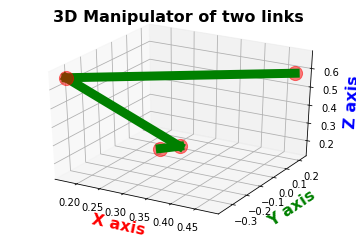

In [9]:
#plotting the chains of the robot to make up the robot model
links = foward_kinematics_plot([jangles_dynamicbag1[0]])
ax = plt.axes(projection = '3d')
def robot3D(measurements,axis):
    ax.scatter3D((measurements[0][0]), (measurements[0][1]), (measurements[0][2]),
                     c='red',s=200, label ='joints',alpha=0.5)
    ax.scatter3D((measurements[1][0]), (measurements[1][1]), (measurements[1][2]),
                     c='red',s=200, label ='joints',alpha=0.5)
    ax.scatter3D((measurements[2][0]), (measurements[2][1]), (measurements[2][2]),
                     c='red',s=200, label ='joints',alpha=0.5)
    ax.scatter3D((measurements[3][0]), (measurements[3][1]), (measurements[3][2]),
                     c='red',s=200, label ='joints',alpha=0.5)

    ax.plot3D([measurements[0][0],measurements[1][0]], 
                  [measurements[0][1],measurements[1][1]], 
                  [measurements[0][2],measurements[1][2]], 
                  'green',linewidth=9.0, label='links')

    ax.plot3D([measurements[1][0],measurements[2][0]], 
                  [measurements[1][1],measurements[2][1]], 
                  [measurements[1][2],measurements[2][2]], 
                  'green',linewidth=9.0, label='links')

    ax.plot3D([measurements[2][0],measurements[3][0]], 
                  [measurements[2][1],measurements[3][1]], 
                  [measurements[2][2],measurements[3][2]], 
                  'green',linewidth=9.0, label='links')

    ax.set_xlabel('X axis', fontsize=16, fontweight='bold', color='red')
    ax.set_ylabel('Y axis',  fontsize=16, fontweight='bold', color='green')
    ax.set_zlabel('Z axis',  fontsize=16, fontweight='bold', color='blue')
    ax.set_title('3D Manipulator of two links',fontsize = 16, fontweight = 'bold')
robot3D(links,ax)   


In [10]:
#this one also computes the end-effector prior
def kinematics_endeff(joint_angles):
    robot = URDF.from_xml_file('robot.urdf')
    links = [rl.name for rl in robot.links]
    kdl_kin_ee_dy = KDLKinematics(robot,'base_link','elbow2_link')
    #print(kdl_kin_ee_dy.get_joint_names())
    ee_list_dy = []
    for joints in joint_angles:
        ee_list_dy.append(kdl_kin_ee_dy.forward(joints)) 
    return ee_list_dy
endEffe = kinematics_endeff(jangles_dynamicbag1)
#endEffe[0]

In [11]:
#Unscented Transform parameters                                    
n_dim = 3
alpha = 0.5
kappa = 0
lamda = (((alpha)**2) * (n_dim + kappa) - n_dim)
beta = 2.0
resh1 = 3
resh2 = 2
# computing cov of static data for estm uncertainty in angles and
covdata_transp = (jangles_staticbag0).T
cov_theta= (np.cov((covdata_transp).astype(float))) + (np.eye(3) *0.05)

In [12]:
#computing the sigma points
def sigma_points(mu,cov,n,lam):
#computes the cholesky decomposition of matrix square root A, 
#which assumes it to be a symmetric and positive definite matrix
    chol_A = np.linalg.cholesky((n+lam)*cov)
    sigma_pointx = np.zeros((7,len(mu)))
    sigma_pointx[0,:] = mu
    for i in range(3):
        sigma_pointx[i+1,:] =  mu + chol_A[:,i]
    for i in range(3):
        sigma_pointx[i+4,:] =  mu - chol_A[:,i]
    return sigma_pointx
sigma_angles = sigma_points(mu_theta,cov_theta,n_dim,lamda)
print(mu_theta,sigma_angles)


(array([ 1.13085008, -2.23437572,  2.36087775]), array([[ 1.13085008, -2.23437572,  2.36087775],
       [ 1.32449928, -2.23436949,  2.36087754],
       [ 1.13085008, -2.0403948 ,  2.36084542],
       [ 1.13085008, -2.23437572,  2.55453078],
       [ 0.93720088, -2.23438194,  2.36087797],
       [ 1.13085008, -2.42835663,  2.36091009],
       [ 1.13085008, -2.23437572,  2.16722472]]))


In [13]:
#assigning weights to the computed sigmas
def weight_sigma(al,n,k,b,lam):
    c = n + lam
    w_mu = np.zeros((2 * n + 1,1))
    w_mu[0,0] = lam / c
    
    w_cov = np.zeros((2 * n + 1,1))
    w_cov[0,0] = w_mu[0,0] + (1 - al**2 + b)
    for i in range(6):
        w_mu[i+1,0] = 0.5/c
        w_cov[i+1,0] = 0.5/c
    return w_mu,w_cov
wsm, wsc = weight_sigma(alpha,n_dim,kappa,beta,lamda) 
print(wsm,wsc)

(array([[-3.        ],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667]]), array([[-0.25      ],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667],
       [ 0.66666667]]))


In [14]:
#estimating the resulting posterior distribution of the end-effector.
def estimate_distri(transformedpoints,weight_mean,weight_cov,n,resh):
    mu_Keeprime = np.zeros((resh,1))
    cov_Keeprime = np.zeros((resh,resh))
    for i in range(2*(n) + 1):
        mu_Keeprime = mu_Keeprime + weight_mean[i]*transformedpoints[i,:].reshape(resh,1)
    for i in range(2*(n) + 1):
        cov_Keeprime = cov_Keeprime + weight_cov[i]*(transformedpoints[i,:].reshape(resh,1) 
                    - mu_Keeprime).dot((transformedpoints[i,:].reshape(resh,1) - mu_Keeprime).T)
    return mu_Keeprime, cov_Keeprime

In [15]:
#Transform joint angle sigma points to end-effector space
def unscented_transform():
    #Generate sigma joint angle points
    sigma_angles = sigma_points(mu_theta,cov_theta,n_dim,lamda)
    #Calculate sigma joint angle weights
    wsm, wsc = weight_sigma(alpha,n_dim,kappa,beta,lamda) 
    #propagating the points thru fk
    fbase_eeMatrices = kinematics_endeff(sigma_angles)
    fbase_poses = []
    for fbase in fbase_eeMatrices:
        fbase_poses.append(fbase[0:3,3])
        fbase_posesArr = np.array(fbase_poses)
    fbase_posesArrshaped = ((np.reshape(fbase_posesArr, (7, 3))))
    #Estimating the new Gaussian distribution of the end-effector space
    mu_xee, covmat_xee = estimate_distri(fbase_posesArrshaped,wsm, wsc,n_dim,3)
    mu_xee = mu_xee.reshape(3,)
    return mu_xee,covmat_xee #,fbase_posesArrshaped
mu_xee,covmat_xee = unscented_transform()
unscented_transform()

(array([0.45958152, 0.18833365, 0.57417759]),
 array([[ 0.00412021,  0.00137319, -0.00108422],
        [ 0.00137319,  0.00998957, -0.00238898],
        [-0.00108422, -0.00238898,  0.0248806 ]]))

In [16]:
#plotting the end-effector distribution
def plot_ellipsoid(mu,cov,ax):
    ellipNumber = 3
    #set colour map so each ellipsoid as a unique colour
    norm = colors.Normalize(vmin=0, vmax=ellipNumber)
    cmap = cm.jet
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    #compute each and plot each ellipsoid iteratively
    for indx in range(ellipNumber):
        # your ellispsoid and center in matrix form
        A = cov
        center = mu
        # find the rotation matrix and radii of the axes
        radii, rotation = np.linalg.eig(A)
        #print(radii.shape)
        radii = np.sqrt(radii)#reduce radii by factor 0.3 
        # calculate cartesian coordinates for the ellipsoid surface
        u = np.linspace(0.0, 2.0 * np.pi, 60)
        v = np.linspace(0.0, np.pi, 60)
        x = radii[0] * np.outer(np.cos(u), np.sin(v))
        y = radii[1] * np.outer(np.sin(u), np.sin(v))
        z = radii[2] * np.outer(np.ones_like(u), np.cos(v))

        for i in range(len(x)):
            for j in range(len(x)):
                [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + center

        ax.plot_surface(x, y, z,  rstride=3, cstride=3,  color=m.to_rgba(indx), linewidth=0.1, alpha=1.0, shade=True)
        ax.set_xlabel('X ', fontsize=20, fontweight='bold', color='red')
        ax.set_ylabel('Y',  fontsize=20, fontweight='bold', color='green')
        ax.set_zlabel('Z',  fontsize=20, fontweight='bold', color='blue')
#         ax.set_title('3D Manipulator of two links',fontsize = 20, fontweight = 'bold')
        plt.rcParams["font.size"] = 20
        plt.rcParams["font.weight"] = "bold"
        plt.rcParams["axes.labelweight"] = "bold"

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
links = foward_kinematics_plot([mu_theta])
robot3D(links,ax)
plot_ellipsoid(mu_xee,covmat_xee,ax)
ax.set_xlim(-0.1, 0.6)
ax.set_ylim(-0.1, 0.6)
ax.set_zlim(-0.1, 0.6)
fig = plt.show()

In [18]:
#Camera model that projects a point from 3D to image plane
def rtmapping(X_world,camTransform):
    K = np.matrix([[136.848632, 0.0, 128.029255, 0],[0.0, 138.204089, 86.254287, 0],[ 0.0, 0.0, 1.0, 0.0]]) 
    P = K * camTransform 
    x_im = P.dot(np.concatenate((X_world, np.array([1])), axis=0))
    return x_im

In [19]:
#propagating the ee distribution (posterior)through the camera model by generating new sigma points from it
def cameramodel_UT():
    mu_xee, covmat_xee = unscented_transform()
    sigma_xee = sigma_points(mu_xee,covmat_xee, n_dim,lamda)
    #Assign weights to the sigma points
    wsm, wsc = weight_sigma(alpha,n_dim,kappa,beta,lamda) 
    
    image_eeHomog = np.ones((sigma_xee.shape[0],3))
    #Propagating sigma points through camera model
    for i in range(sigma_xee.shape[0]):
        #a = ((sigma_xee[i,:]))#, np.array([1])), axis=0)
        image_eeHomog[i,:] = rtmapping(sigma_xee[i,:], turretCameraTrans4m[0])
    print(sigma_xee.shape)
    return image_eeHomog      
image_eeHomog = cameramodel_UT()
image_eeHomog

(7, 3)


array([[114.14490085,  75.7140283 ,   0.92113411],
       [118.83475837,  85.53579074,   0.95431509],
       [102.99885284,  81.4163583 ,   0.90957307],
       [119.21321264,  70.28262154,   1.00766721],
       [109.45504333,  65.89226585,   0.88795312],
       [125.29094886,  70.01169829,   0.93269514],
       [109.07658906,  81.14543505,   0.834601  ]])

In [20]:
#converts the point to 2d
def endEffecImage2d(ee_ImaHomo):
    for i in range(len(ee_ImaHomo )):
        x= ee_ImaHomo[:,0]/ee_ImaHomo[:,2]
        y= ee_ImaHomo[:,1]/ee_ImaHomo[:,2]
        xx,yy = x.reshape(len(ee_ImaHomo),1),y.reshape(len(ee_ImaHomo),1)
    return np.hstack((xx,yy))
end_effe2D = endEffecImage2d(image_eeHomog)
end_effe2D

array([[123.91778776,  82.19653106],
       [124.52360758,  89.63055411],
       [113.23867884,  89.51051974],
       [118.30613413,  69.74784982],
       [123.26669144,  74.20691962],
       [134.33215514,  75.06386057],
       [130.6930964 ,  97.22662082]])

In [21]:
#predicted end-effector disribution in the image plane
wsm, wsc = weight_sigma(alpha,n_dim,kappa,beta,lamda) 
predictedObservat_mu,predictedUncer_cov = estimate_distri(end_effe2D,wsm, wsc,n_dim,2)

In [22]:
#load the data bags of camera data
camera_dylist = []
for i in range(len(vicobags_dyna)):
    robot_dy = np.load(data_path+'robot_dynaPosArr%d.npy'%i)
    camera_dylist.append(robot_dy)

#get the 2nd bagdata from the list and extract one point 
cam_dataXYZ = camera_dylist[1]
print(cam_dataXYZ[0])

[0.09550175 0.04238624 0.37334079]


In [23]:
#Propagate 3D marker measurement through camera (no rotation and translation)
#use the identity matrix "camIdentTrans"
camIdentTans = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]) 
sensordata_z = rtmapping(cam_dataXYZ[0], camIdentTans)
sensordata_in2d = endEffecImage2d(sensordata_z)
sensordata_in2d.reshape(2,1)
#measuremnt noise in pixels
m_noiseQ = 150 *np.eye(2,dtype=float)

In [24]:
#plotting the ee distribution in 2D
def plot2Dellipse(mu,cov,point,xlimit,ylimit,edgecolor,color):
    a = np.squeeze(np.asarray(point))
    x0,y0 = a
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    from matplotlib.patches import Ellipse
    import matplotlib.pyplot as plt
    ax = plt.subplot(111, aspect='equal')
    for j in range(1, 4):
        ell = Ellipse(xy=(mu[0], mu[1]),width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                          angle=np.rad2deg(np.arccos(v[0, 0])),linewidth=4,edgecolor=edgecolor)
        ell.set_facecolor('none')
        ax.add_artist(ell)
    plt.scatter(x0, y0,c=color)
    #plt.scatter(x1, y1,c='blue')
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xlabel('x-axis', fontsize=10)
    plt.ylabel('y-axis', fontsize=10)
    

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


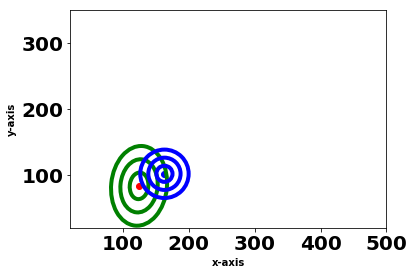

In [25]:
#plot eedistribution obtained by the kinematics vs  the camera distribution 
plot2Dellipse(predictedObservat_mu,predictedUncer_cov,predictedObservat_mu, (20,500), (20,350), "green","red")
plot2Dellipse(sensordata_in2d.reshape(2,1),m_noiseQ,sensordata_in2d.reshape(2,1), (20,500), (20,350),"blue","blue")
plt.show()

In [26]:
mu_xee, covmat_xee = unscented_transform() 
sigma_xee = sigma_points(mu_xee,covmat_xee, n_dim,lamda)

#cross covariance between X and Z
cross_cov = np.zeros((3,2))
for i in range(2*(3) + 1):
        cross_cov = cross_cov + wsc[i] *(sigma_xee[i,:].reshape(3,1)
                                     - mu_xee.reshape(3,1)).dot ((end_effe2D[i,:].reshape(2,1) 
                                                              - predictedObservat_mu).T)
        
        
#Compute Kalman gain and the final prediction mean and covariance
kalman_gain = cross_cov.dot(np.linalg.inv(predictedUncer_cov))

# actual_mu_meas is T to align (2,1) dim, mu_xee is reshaped from 3, to 3,1
final_predic_mu = mu_xee.reshape(3,1) + kalman_gain.dot(sensordata_in2d.reshape(2,1) - predictedObservat_mu)
mu_final = np.squeeze(np.asarray(final_predic_mu))
final_predic_cov = covmat_xee - kalman_gain.dot(predictedUncer_cov).dot(kalman_gain.T)

In [27]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
links = foward_kinematics_plot([mu_theta])
robot3D(links,ax)
plot_ellipsoid(mu_final,final_predic_cov,ax)
ax.set_xlim(-0.1, 0.7)
ax.set_ylim(-0.1, 0.7)
ax.set_zlim(-0.1, 0.7)
fig = plt.show()


In [28]:
#vicon_dylist = []
# for i in range(len(vicobags_dyna)):     
#     vicon_dy = np.load(data_path+'vicon_dynaPosArr%d.npy'%i)
#     vicon_dylist.append(vicon_dy)    
# vicon_endeff_subsetbag1 = vicon_dylist[1]

# #projecting it to the image plane
# ee_poseVicon = rtmapping(vicon_endeff_subsetbag1[0])
# #reuse the func for converting to 2D image plane
# actual_mu_meas = endEffecImage2d(ee_poseVicon)
# actual_point = actual_mu_meas.reshape(2,1)
# nDmeanTo_1d = np.squeeze(np.asarray(actual_point))
